# A/B Testing - Lab

## Introduction

In this lab, you'll go through a the process of designing an experiment.

## Objectives
You will be able to:

* Design, structure, and run an A/B test


## The Scenario

You've been tasked with designing an experiment to test whether a new email template will be more effective for your company's marketing team. The current template has a 5% response rate (with standard deviation .0475), which has outperformed numerous other templates in the past. The company is excited to test the new design that was developed internally, but nervous about losing sales if it is not to work out. As a result, they are looking to determine how many individuals they will need to serve the new email template to in order to detect a 1% performance increase (or decrease).


## Step 1: State the Null Hypothesis, $H_0$

State your null hypothesis here (be sure to make it quantitative as before)

h_0 : The new template is no more effective than the old template.

## Step 2: State the Alternative Hypothesis, $H_1$

State your alternative hypothesis here (be sure to make it quantitative as before)

h_1 : The new template is more effective than the old template.

## Step 3: Calculate n for standard alpha and power thresholds

Now define what alpha and beta you believe might be appropriate for this scenario.
To start, arbitrarily set alpha to 0.05. From this, calculate the required sample size to detect a .01 response rate difference at a power of .8.

> Note: Be sure to calculate a normalized effect size using Cohen's d from the raw response rate difference.

In [24]:
current_response=0.05
current_standard_deviation=0.0475

In [25]:
alpha=0.05
response_rate_difference=0.01
power=0.8

In [26]:
cohens_d = response_rate_difference/current_standard_deviation
cohens_d

0.21052631578947367

In [27]:
from statsmodels.stats.power import TTestIndPower, TTestPower

In [35]:
"""
 def solve_power(self, effect_size=None, nobs=None, alpha=None, power=None,
                    alternative='two-sided'):
        '''solve for any one parameter of the power of a one sample t-test

        for the one sample t-test the keywords are:
            effect_size, nobs, alpha, power

        Exactly one needs to be ``None``, all others need numeric values.

        This test can also be used for a paired t-test, where effect size is
        defined in terms of the mean difference, and nobs is the number of
        pairs.

        Parameters
        ----------
        effect_size : float
            standardized effect size, mean divided by the standard deviation.
            effect size has to be positive.
        nobs : int or float
            sample size, number of observations.
        alpha : float in interval (0,1)
            significance level, e.g. 0.05, is the probability of a type I
            error, that is wrong rejections if the Null Hypothesis is true.
        power : float in interval (0,1)
            power of the test, e.g. 0.8, is one minus the probability of a
            type II error. Power is the probability that the test correctly
            rejects the Null Hypothesis if the Alternative Hypothesis is true.
        alternative : string, 'two-sided' (default) or 'one-sided'
            extra argument to choose whether the power is calculated for a
            two-sided (default) or one sided test.
            'one-sided' assumes we are in the relevant tail.

        Returns
        -------
        value : float
            The value of the parameter that was set to None in the call. The
            value solves the power equation given the remaining parameters.

"""
test = TTestIndPower() # for two sample tests

In [36]:
test.solve_power(effect_size=cohens_d,alpha=alpha,alternative='larger',power=power)

279.6667468021971

## Step 4: Plot Power Curves for Alternative Experiment Formulations

While you now know how many observations you need in order to run a t-test for the given formulation above, its worth exploring what sample sizes would be required for alternative test formulations. For example, how much does the required sample size increase if you put the more stringent criteria of $\alpha=.01$? Or what is the sample size required to detect a .03 response rate difference at the same $\alpha$ and power thresholds? To investigate this, plot power vs sample size curves for alpha values of .01, .05 and .1 along with varying response rate differences of .005, .01, .02 and .03.

In [46]:
import numpy as np
import matplotlib.pyplot as plt

<Figure size 432x288 with 0 Axes>

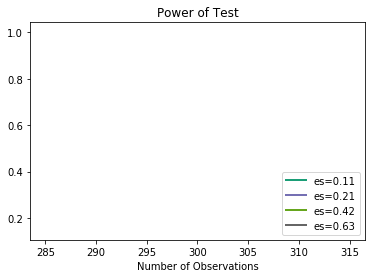

<Figure size 432x288 with 0 Axes>

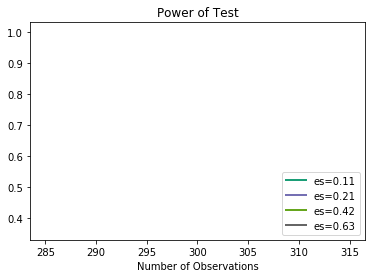

<Figure size 432x288 with 0 Axes>

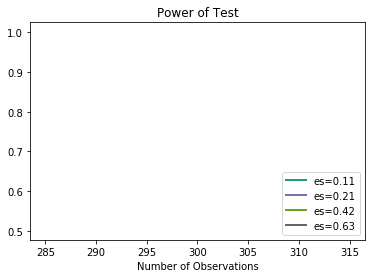

In [47]:
#Your code; plot power curves for the various alpha and effect size combinations
"""
TTestIndPower.plot_power(dep_var='nobs', nobs=None, effect_size=None, alpha=0.05, ax=None, title=None, plt_kwds=None, **kwds)
plot power with number of observations or effect size on x-axis

Parameters
dep_var (string in ['nobs', 'effect_size', 'alpha']) – This specifies which variable is used for the horizontal axis. If dep_var=’nobs’ (default), then one curve is created for each value of effect_size. If dep_var=’effect_size’ or alpha, then one curve is created for each value of nobs.

nobs (scalar or array_like) – specifies the values of the number of observations in the plot

effect_size (scalar or array_like) – specifies the values of the effect_size in the plot

alpha (float or array_like) – The significance level (type I error) used in the power calculation. Can only be more than a scalar, if dep_var='alpha'

ax (None or axis instance) – If ax is None, than a matplotlib figure is created. If ax is a matplotlib axis instance, then it is reused, and the plot elements are created with it.

title (string) – title for the axis. Use an empty string, '', to avoid a title.

plt_kwds (None or dict) – not used yet

kwds (optional keywords for power function) – These remaining keyword arguments are used as arguments to the power function. Many power function support alternative as a keyword argument, two-sample test support ratio.
"""
alpha_list = [.01, .05, .1]
for alpha in alpha_list:
    plt.figure()
    test.plot_power(nobs=300, effect_size=np.array([.005, .01, .02, .03])/current_standard_deviation,
                alpha=alpha,alternative='larger')

## Step 5: Propose a Final Experimental Design

Finally, now that you've explored some of the various sample sizes required for statistical tests of varying power, effect size and type I errors, propose an experimental design to pitch to your boss and some of the accompanying advantages or disadvantages with it.

### Your answer here

## Summary

In this lab, you practiced designing an initial experiment and then refined the parameters of the experiment based on an initial sample to determine feasibility.